<a href="https://colab.research.google.com/github/anurag4667/ML/blob/main/ClusteringKnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [8]:
X,y= make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [9]:
X.shape

(1000, 2)

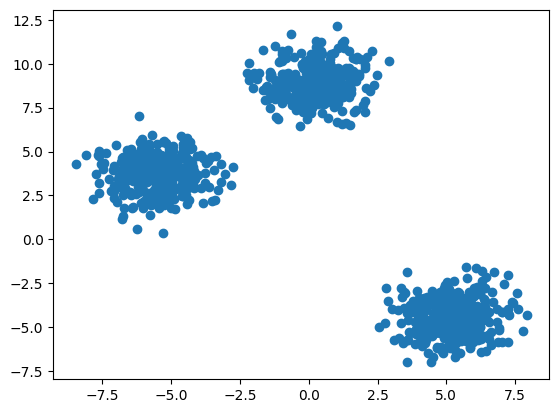

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [12]:
from sklearn.cluster import KMeans


In [13]:
# elboe method

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

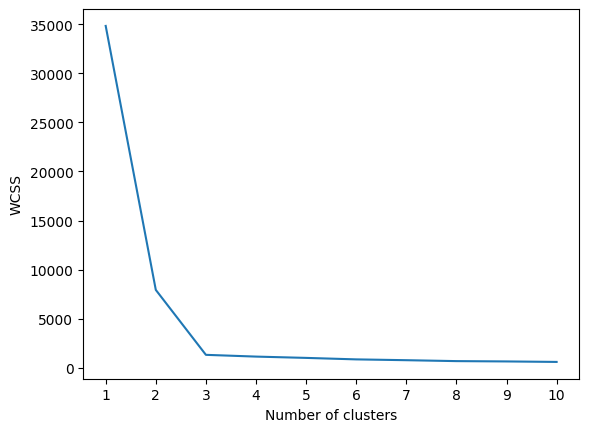

In [15]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_train)

In [17]:
kmeans.predict(X_test)

array([2, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2,
       0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2,
       0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2,

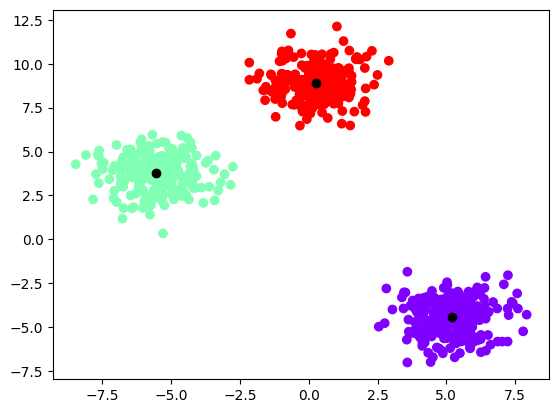

In [21]:
plt.scatter(X_train[:,0],X_train[:,1], c = y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.show()

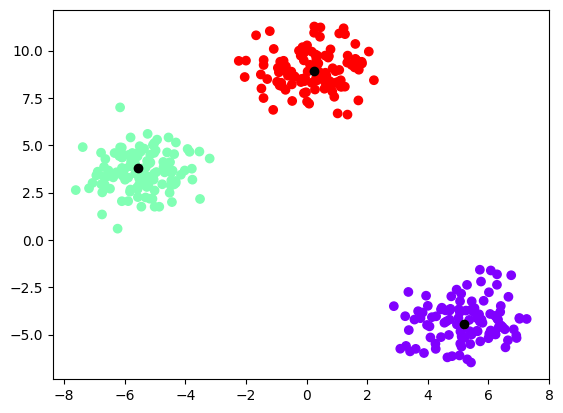

In [22]:
plt.scatter(X_test[:,0],X_test[:,1], c =kmeans.predict(X_test) , cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.show()

In [23]:
!pip install kneed

In [24]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

In [25]:
# siloutte score
from sklearn.metrics import silhouette_score
silhouette_score(X_train, y_kmeans)

np.float64(0.8071181203797672)